In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
label_df = pd.read_csv("/home/kongge/projects/Phd/data/all_labels.csv")
prs_df = pd.read_csv('/home/kongge/projects/Phd/data/Only_PGS.csv')
data = pd.merge(prs_df, label_df, left_on='FID', right_on='eid')

In [3]:
prs_df

,FID,AF,CAD,DCM,HT,ISS,VTE,STK,HF,IH,...,GM,HB,HIR,IRM,ISM,NMR,PM,TSH,TM,AST
0,1000011,-0.141637,-0.477495,-0.195173,0.931986,-0.894940,-0.473692,-0.317333,-1.737386,0.020924,...,0.079802,0.695521,1.277698,1.504517,-1.692002,-1.071869,-1.125821,-0.288634,1.733040,-0.264657
1,1000026,-1.473287,0.367636,-1.566975,0.309153,-0.882619,1.044783,-0.128957,-1.362442,-0.811806,...,0.026687,1.076239,0.824551,0.690095,0.018237,-1.071869,-0.092784,0.843544,0.983909,-0.596751
2,1000044,0.585503,2.575461,1.860125,1.589465,0.237156,0.309952,0.659745,-0.803434,-1.499108,...,-1.726094,1.125755,-0.352180,-0.544924,-0.093467,-0.784642,-0.278345,0.444989,0.895999,0.153730
3,1000058,0.847278,1.352384,-1.004531,1.490209,1.398947,-1.508763,1.176881,-1.164744,1.711949,...,0.132917,0.406527,-0.551243,-0.256447,1.001336,-1.071869,1.090921,-0.241189,0.366977,-0.084286
4,1000116,-0.805020,-1.414212,-1.471695,-0.624252,-0.147236,-1.015938,-0.131356,-1.573774,-0.979470,...,1.752911,-0.531077,0.120916,-0.138439,0.928665,0.565118,-0.054315,-1.173920,-0.205888,-0.852839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336974,6023498,-0.779058,0.723359,0.627861,0.608226,0.502332,-0.416751,0.846122,1.364426,0.426492,...,0.026687,-0.632701,0.033418,0.165458,-0.954425,0.038104,-1.563399,0.586071,0.152152,-0.977810
336975,6023514,1.169570,-1.041206,0.685736,0.225246,0.006642,1.845830,-1.305210,-0.128534,0.239780,...,1.062422,-0.736056,0.243756,1.266113,0.187791,-1.071869,-0.570433,-0.486148,0.664426,-0.221420
336976,6023529,1.536596,-0.944525,-1.870310,-1.580533,0.422397,0.295691,1.207604,-0.898874,0.581479,...,-0.345115,0.528340,1.535187,0.872027,-0.182953,1.675091,0.401696,0.794166,-2.078717,0.779929
336977,6023541,-0.441969,-1.006966,2.482164,1.721099,0.079389,-1.418951,0.887717,0.580452,0.091717,...,-0.159214,-1.723317,-1.550319,-0.558635,0.989086,-1.071869,0.002586,-0.034688,-0.387663,0.904508


In [4]:
label_df # only for Class_I10

,eid,Class_A00,Class_A01,Class_A02,Class_A03,Class_A04,Class_A05,Class_A06,Class_A07,Class_A08,...,Class_I48,Class_I63,Class_I10,Class_F00,Class_F20,Class_C50,Class_C18,Class_C56,Class_J45,Class_M05
0,1000011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000026,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1000044,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000058,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1000116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336974,6023498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336975,6023514,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
336976,6023529,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
336977,6023541,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
label_selected = label_df['Class_I10']

In [6]:
label_selected

0         0
1         1
2         0
3         1
4         0
         ..
336974    0
336975    1
336976    0
336977    0
336978    0
Name: Class_I10, Length: 336979, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = prs_df.drop(columns=['FID'])
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
prs_df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

In [8]:
prs_df_normalized

,AF,CAD,DCM,HT,ISS,VTE,STK,HF,IH,AAA,...,GM,HB,HIR,IRM,ISM,NMR,PM,TSH,TM,AST
0,0.432506,0.461849,0.456030,0.640938,0.421417,0.458939,0.444609,0.268111,0.530358,0.686878,...,0.542029,0.592280,0.654823,0.663314,0.256496,0.000000,0.426032,0.501385,0.710446,0.467130
1,0.283769,0.553655,0.315785,0.573452,0.422716,0.608267,0.463927,0.309186,0.437324,0.662286,...,0.536232,0.633660,0.611275,0.573128,0.463352,0.000000,0.534133,0.629220,0.641481,0.430507
2,0.513724,0.793488,0.666151,0.712178,0.540801,0.536003,0.544809,0.370426,0.360538,0.620975,...,0.344928,0.639042,0.498190,0.436367,0.449841,0.087730,0.514715,0.584219,0.633388,0.513268
3,0.542962,0.660626,0.373286,0.701423,0.663316,0.357149,0.597843,0.330844,0.719281,0.612873,...,0.547826,0.560868,0.479060,0.468312,0.582258,0.000000,0.658001,0.506742,0.584686,0.487020
4,0.358410,0.360095,0.325526,0.472314,0.500265,0.405614,0.463681,0.286034,0.418592,0.540207,...,0.724638,0.458958,0.543655,0.481380,0.573469,0.500000,0.538158,0.401427,0.531947,0.402267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336974,0.361310,0.592296,0.540172,0.605857,0.568765,0.464538,0.563923,0.607916,0.575668,0.529904,...,0.536232,0.447913,0.535246,0.515032,0.345707,0.339029,0.380242,0.600149,0.564909,0.388485
336975,0.578960,0.400614,0.546089,0.564360,0.516492,0.687043,0.343300,0.444361,0.554808,0.404555,...,0.649275,0.436679,0.555460,0.636914,0.483859,0.000000,0.484150,0.479084,0.612069,0.471898
336976,0.619955,0.411116,0.284774,0.368698,0.560335,0.534601,0.600993,0.359970,0.592983,0.499185,...,0.495652,0.574108,0.679567,0.593275,0.439017,0.839029,0.585877,0.623645,0.359533,0.582323
336977,0.398961,0.404333,0.729745,0.726441,0.524163,0.365981,0.568188,0.522031,0.538267,0.529901,...,0.515942,0.329372,0.383048,0.434849,0.580777,0.000000,0.544113,0.530059,0.515213,0.596061


In [11]:
positive_samples = prs_df_normalized.loc[label_selected[label_selected == 1].index]

In [12]:
positive_samples

,AF,CAD,DCM,HT,ISS,VTE,STK,HF,IH,AAA,...,GM,HB,HIR,IRM,ISM,NMR,PM,TSH,TM,AST
1,0.283769,0.553655,0.315785,0.573452,0.422716,0.608267,0.463927,0.309186,0.437324,0.662286,...,0.536232,0.633660,0.611275,0.573128,0.463352,0.000000,0.534133,0.629220,0.641481,0.430507
3,0.542962,0.660626,0.373286,0.701423,0.663316,0.357149,0.597843,0.330844,0.719281,0.612873,...,0.547826,0.560868,0.479060,0.468312,0.582258,0.000000,0.658001,0.506742,0.584686,0.487020
5,0.615026,0.634286,0.414675,0.626317,0.724255,0.685249,0.624872,0.649739,0.465197,0.510260,...,0.440580,0.464134,0.449423,0.509876,0.502156,0.587729,0.414123,0.614884,0.485294,0.321375
8,0.396000,0.600425,0.679648,0.698508,0.509378,0.537710,0.407195,0.510082,0.659203,0.494360,...,0.559420,0.382702,0.524019,0.546375,0.402094,0.339029,0.347798,0.575458,0.559331,0.451463
17,0.459159,0.675991,0.330293,0.615750,0.639061,0.449140,0.338378,0.503361,0.628590,0.479100,...,0.437681,0.627962,0.607527,0.580904,0.299539,0.500000,0.667477,0.588080,0.574544,0.568685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336957,0.446656,0.618188,0.387211,0.543611,0.701340,0.638700,0.517493,0.369679,0.635240,0.618417,...,0.510145,0.373406,0.529211,0.530895,0.451565,0.000000,0.538074,0.404613,0.669371,0.543291
336959,0.353197,0.705733,0.576448,0.694658,0.413812,0.660384,0.667364,0.441374,0.637706,0.578966,...,0.733333,0.490688,0.499088,0.486668,0.402651,0.500000,0.633767,0.440056,0.424949,0.482036
336968,0.400128,0.494421,0.415111,0.688202,0.356372,0.417210,0.567532,0.444361,0.699960,0.540863,...,0.446377,0.475261,0.513646,0.473851,0.362129,0.339029,0.564660,0.395453,0.555781,0.294509
336971,0.500562,0.530814,0.375406,0.631933,0.405551,0.678936,0.506055,0.277819,0.293844,0.506870,...,0.623188,0.309757,0.560385,0.614502,0.547856,0.500000,0.637202,0.687869,0.547160,0.522582


In [13]:
# 对这些样本使用GAN 进行增强
# 定义生成器
class Generator(nn.Module):
    def __init__(self, noise_dim, feature_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, feature_dim),
        )

    def forward(self, noise):
        return self.model(noise)

In [14]:
class Discriminator(nn.Module):
    def __init__(self, feature_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(feature_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, features):
        return self.model(features)

In [15]:
noise_dim = 100
feature_dim = positive_samples.shape[1]

generator = Generator(noise_dim, feature_dim)
discriminator = Discriminator(feature_dim)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0001)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0001)

In [21]:
positive_samples_tensor = torch.tensor(positive_samples.values, dtype=torch.float32)
num_epochs = 1000
batch_size = 128
real_target = torch.ones(batch_size, 1)
fake_target = torch.zeros(batch_size, 1)

In [23]:
for epoch in range(num_epochs):
    for i in range(0, len(positive_samples_tensor), batch_size):
        real_features = positive_samples_tensor[i:i+batch_size]

        noise = torch.randn(real_features.size(0), noise_dim)

        fake_features = generator(noise)
        optimizer_D.zero_grad()

        real_output = discriminator(real_features)
        fake_output = discriminator(fake_features.detach())

        real_loss = criterion(real_output, real_target[:real_features.size(0)])
        fake_loss = criterion(fake_output, fake_target[:real_features.size(0)])
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()
        generated_features = generator(noise)
        g_loss = criterion(discriminator(generated_features), real_target[:real_features.size(0)])
        g_loss.backward()
        optimizer_G.step()

    with torch.no_grad():
        real_predictions = (real_output >= 0.5).float()
        real_accuracy = (real_predictions == real_target[:real_features.size(0)]).float().mean().item()

        fake_predictions = (fake_output < 0.5).float()
        fake_accuracy = (fake_predictions == fake_target[:real_features.size(0)]).float().mean().item()

        d_accuracy = (real_accuracy + fake_accuracy) / 2

    print(f"Epoch [{epoch+1}/{num_epochs}] - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}, D Accuracy: {d_accuracy:.4f}")

    # 停止条件：判别器准确率接近 50%
    if abs(real_accuracy - 0.5) < 0.05 and abs(fake_accuracy - 0.5) < 0.05:
        print("判别器无法有效区分真实和生成样本，训练达到平衡，可以停止。")
        break

Epoch [1/1000] - D Loss: 1.3090, G Loss: 0.7422, D Accuracy: 0.4589
Epoch [2/1000] - D Loss: 1.4268, G Loss: 0.6742, D Accuracy: 0.5137
Epoch [3/1000] - D Loss: 1.2814, G Loss: 0.7693, D Accuracy: 0.4315
Epoch [4/1000] - D Loss: 1.4062, G Loss: 0.6789, D Accuracy: 0.6849
Epoch [5/1000] - D Loss: 1.3591, G Loss: 0.7277, D Accuracy: 0.3699
Epoch [6/1000] - D Loss: 1.3831, G Loss: 0.7115, D Accuracy: 0.4178
Epoch [7/1000] - D Loss: 1.4365, G Loss: 0.6638, D Accuracy: 0.5822
Epoch [8/1000] - D Loss: 1.4482, G Loss: 0.6351, D Accuracy: 0.7671
Epoch [9/1000] - D Loss: 1.4961, G Loss: 0.6496, D Accuracy: 0.5342
Epoch [10/1000] - D Loss: 1.4160, G Loss: 0.6442, D Accuracy: 0.8767
Epoch [11/1000] - D Loss: 1.4096, G Loss: 0.6639, D Accuracy: 0.7671
Epoch [12/1000] - D Loss: 1.3775, G Loss: 0.7086, D Accuracy: 0.3699
Epoch [13/1000] - D Loss: 1.3890, G Loss: 0.6794, D Accuracy: 0.7603
Epoch [14/1000] - D Loss: 1.3948, G Loss: 0.7256, D Accuracy: 0.2877
Epoch [15/1000] - D Loss: 1.4125, G Loss: 0

In [24]:
torch.save(generator.state_dict(), "generator_model_Class_I10.pth")

In [77]:
num_samples = 100000
noise = torch.randn(num_samples, noise_dim)
generated_samples = generator(noise)

In [78]:
generated_samples.shape

torch.Size([100000, 80])

In [79]:
generated_samples

tensor([[0.4866, 0.3373, 0.2107,  ..., 0.6783, 0.5552, 0.6049],
        [0.5014, 0.4444, 0.2562,  ..., 0.8685, 0.3691, 0.6712],
        [0.4786, 0.4187, 0.3185,  ..., 0.6521, 0.5602, 0.4897],
        ...,
        [0.4830, 0.4705, 0.3218,  ..., 0.6605, 0.4693, 0.4927],
        [0.4970, 0.6139, 0.3403,  ..., 0.6831, 0.4185, 0.4955],
        [0.4791, 0.4885, 0.2122,  ..., 0.7156, 0.3499, 0.5538]],
       grad_fn=<AddmmBackward0>)

In [80]:
prs_df_normalized['FID'] = prs_df['FID']

In [81]:
prs_df_normalized

,AF,CAD,DCM,HT,ISS,VTE,STK,HF,IH,AAA,...,HB,HIR,IRM,ISM,NMR,PM,TSH,TM,AST,FID
0,0.432506,0.461849,0.456030,0.640938,0.421417,0.458939,0.444609,0.268111,0.530358,0.686878,...,0.592280,0.654823,0.663314,0.256496,0.000000,0.426032,0.501385,0.710446,0.467130,1000011
1,0.283769,0.553655,0.315785,0.573452,0.422716,0.608267,0.463927,0.309186,0.437324,0.662286,...,0.633660,0.611275,0.573128,0.463352,0.000000,0.534133,0.629220,0.641481,0.430507,1000026
2,0.513724,0.793488,0.666151,0.712178,0.540801,0.536003,0.544809,0.370426,0.360538,0.620975,...,0.639042,0.498190,0.436367,0.449841,0.087730,0.514715,0.584219,0.633388,0.513268,1000044
3,0.542962,0.660626,0.373286,0.701423,0.663316,0.357149,0.597843,0.330844,0.719281,0.612873,...,0.560868,0.479060,0.468312,0.582258,0.000000,0.658001,0.506742,0.584686,0.487020,1000058
4,0.358410,0.360095,0.325526,0.472314,0.500265,0.405614,0.463681,0.286034,0.418592,0.540207,...,0.458958,0.543655,0.481380,0.573469,0.500000,0.538158,0.401427,0.531947,0.402267,1000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336974,0.361310,0.592296,0.540172,0.605857,0.568765,0.464538,0.563923,0.607916,0.575668,0.529904,...,0.447913,0.535246,0.515032,0.345707,0.339029,0.380242,0.600149,0.564909,0.388485,6023498
336975,0.578960,0.400614,0.546089,0.564360,0.516492,0.687043,0.343300,0.444361,0.554808,0.404555,...,0.436679,0.555460,0.636914,0.483859,0.000000,0.484150,0.479084,0.612069,0.471898,6023514
336976,0.619955,0.411116,0.284774,0.368698,0.560335,0.534601,0.600993,0.359970,0.592983,0.499185,...,0.574108,0.679567,0.593275,0.439017,0.839029,0.585877,0.623645,0.359533,0.582323,6023529
336977,0.398961,0.404333,0.729745,0.726441,0.524163,0.365981,0.568188,0.522031,0.538267,0.529901,...,0.329372,0.383048,0.434849,0.580777,0.000000,0.544113,0.530059,0.515213,0.596061,6023541


In [82]:
X_tensor = torch.tensor(prs_df_normalized.iloc[:,:-1].values, dtype=torch.float32)

In [83]:
X_tensor.size()

torch.Size([336979, 80])

In [84]:
y_tensor = torch.tensor(label_selected.values, dtype=torch.float32)

In [85]:
y_tensor = y_tensor.unsqueeze(1)

In [86]:
y_tensor.size()

torch.Size([336979, 1])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [88]:
X_train.shape

torch.Size([269583, 80])

In [89]:
y_train.shape

torch.Size([269583, 1])

In [90]:
X_train_augmented = torch.cat((X_train, generated_samples), dim=0)

In [91]:
X_train_augmented.shape

torch.Size([369583, 80])

In [92]:
generated_labels = torch.ones(generated_samples.shape[0], 1)

In [93]:
y_train_augmented = torch.cat((y_train, generated_labels), dim=0)

In [94]:
y_train_augmented.shape

torch.Size([369583, 1])

In [95]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [96]:
input_size = X_train_augmented.shape[1]
output_size = y_train_augmented.shape[1]
model = MLP(input_size, output_size)

In [97]:
X_train_augmented = X_train_augmented.detach() # 去掉计算图

In [98]:
X_train_augmented

tensor([[0.5402, 0.5846, 0.5798,  ..., 0.2895, 0.5730, 0.6625],
        [0.5952, 0.8060, 0.4654,  ..., 0.6675, 0.4554, 0.4270],
        [0.4606, 0.5248, 0.7884,  ..., 0.5460, 0.6709, 0.4283],
        ...,
        [0.4830, 0.4705, 0.3218,  ..., 0.6605, 0.4693, 0.4927],
        [0.4970, 0.6139, 0.3403,  ..., 0.6831, 0.4185, 0.4955],
        [0.4791, 0.4885, 0.2122,  ..., 0.7156, 0.3499, 0.5538]])

In [99]:
# pos_weight = torch.tensor([len(y_train) / y_train.sum().item()], dtype=torch.float32)
# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [100]:
train_dataset = TensorDataset(X_train_augmented, y_train_augmented)
train_loader = DataLoader(train_dataset, batch_size=5096, shuffle=True)
# from torch.utils.data import WeightedRandomSampler
# pos_weight = torch.tensor([len(y_train) / y_train.sum().item()], dtype=torch.float32)
#
# class_weights = [1.0 if label == 0 else pos_weight.item() for label in y_train.numpy()]
# sampler = WeightedRandomSampler(class_weights, len(class_weights), replacement=True)
# train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)

In [107]:
num_epochs = 30
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/30], Loss: 0.4570
Epoch [2/30], Loss: 0.4567
Epoch [3/30], Loss: 0.4568
Epoch [4/30], Loss: 0.4569
Epoch [5/30], Loss: 0.4565
Epoch [6/30], Loss: 0.4564
Epoch [7/30], Loss: 0.4564
Epoch [8/30], Loss: 0.4562
Epoch [9/30], Loss: 0.4563
Epoch [10/30], Loss: 0.4562
Epoch [11/30], Loss: 0.4561
Epoch [12/30], Loss: 0.4564
Epoch [13/30], Loss: 0.4559
Epoch [14/30], Loss: 0.4558
Epoch [15/30], Loss: 0.4559
Epoch [16/30], Loss: 0.4557
Epoch [17/30], Loss: 0.4558
Epoch [18/30], Loss: 0.4558
Epoch [19/30], Loss: 0.4554
Epoch [20/30], Loss: 0.4555
Epoch [21/30], Loss: 0.4553
Epoch [22/30], Loss: 0.4555
Epoch [23/30], Loss: 0.4553
Epoch [24/30], Loss: 0.4553
Epoch [25/30], Loss: 0.4551
Epoch [26/30], Loss: 0.4552
Epoch [27/30], Loss: 0.4550
Epoch [28/30], Loss: 0.4551
Epoch [29/30], Loss: 0.4550
Epoch [30/30], Loss: 0.4550


In [108]:
model.eval()
from sklearn import metrics
with torch.no_grad():
    y_pred = model(X_test).numpy()
    y_true = y_test.numpy()
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    aupr = metrics.average_precision_score(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

In [109]:
roc_auc, aupr

(0.685048001181735, 0.5875200813641989)

In [112]:
# 修改点：1、训练GAN时使用的是随机的noise，是否可以换成其他的noise？ 2、可以使用其他的方法进行data augmentation

In [113]:
# 将生成的数据以及训练的数据进行可视化，查看如何

In [115]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

In [116]:
num_points = 1000
generated_indices = random.sample(range(generated_samples.shape[0]), num_points)
real_indices = random.sample(range(X_train.shape[0]), num_points)

In [118]:
generated_samples_np = generated_samples[generated_indices].cpu().detach().numpy()
real_samples_np = X_train[real_indices].cpu().detach().numpy()

In [119]:
all_samples = np.vstack([generated_samples_np, real_samples_np])
labels = np.array([0] * num_points + [1] * num_points)  # 0 表示生成数据，1 表示真实数据

In [120]:
tsne = TSNE(n_components=2, random_state=42)
all_samples_2d = tsne.fit_transform(all_samples)

/home/kongge/.conda/envs/kongge_pytorch_cpu/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/kongge/.conda/envs/kongge_pytorch_cpu/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


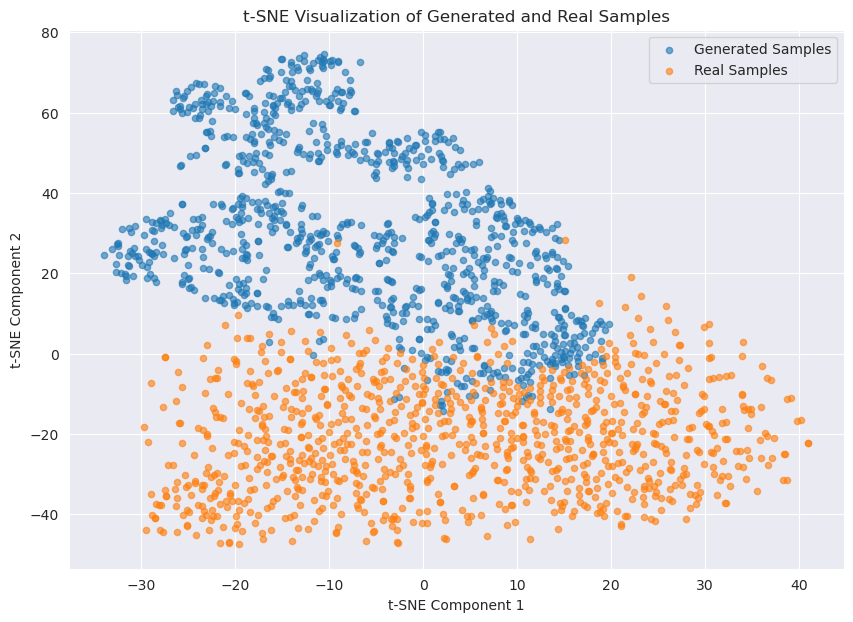

In [121]:
plt.figure(figsize=(10, 7))
plt.scatter(all_samples_2d[labels == 0, 0], all_samples_2d[labels == 0, 1],
            label="Generated Samples", alpha=0.6, s=20)
plt.scatter(all_samples_2d[labels == 1, 0], all_samples_2d[labels == 1, 1],
            label="Real Samples", alpha=0.6, s=20)
plt.title("t-SNE Visualization of Generated and Real Samples")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

In [122]:
# 鉴定为生成的数据质量太差， 对判别器的训练不够，可能是判别器的损失有问题，这是可能是导致最终结果差的根源

In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [125]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [126]:
X_train_resampled # 包含 患病以及不患病 两种

array([[0.5402125 , 0.5845677 , 0.5797579 , ..., 0.28952107, 0.5730223 ,
        0.66245204],
       [0.59521407, 0.8059612 , 0.46542972, ..., 0.6674516 , 0.45537525,
        0.42701313],
       [0.46055704, 0.52480793, 0.7884139 , ..., 0.54598814, 0.6708925 ,
        0.4283263 ],
       ...,
       [0.5690545 , 0.47130713, 0.46890113, ..., 0.6858579 , 0.6764278 ,
        0.46048707],
       [0.42429096, 0.48275307, 0.6596659 , ..., 0.5244105 , 0.59814143,
        0.51003003],
       [0.3406476 , 0.6123448 , 0.36110505, ..., 0.65682846, 0.6351846 ,
        0.5029445 ]], dtype=float32)

In [129]:
X_train_augmented.shape

torch.Size([369583, 80])

In [132]:
X_train_resampled_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)

In [133]:
y_train_resampled_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)

In [134]:
y_train_resampled_tensor.shape

torch.Size([321642])

In [135]:
y_train_resampled_tensor = y_train_resampled_tensor.unsqueeze(1)

In [136]:
input_size = X_train_resampled_tensor.shape[1]
output_size = y_train_resampled_tensor.shape[1]
model_SMOTE = MLP(input_size, output_size)

In [147]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model_SMOTE.parameters(), lr=0.0001)

In [148]:
train_dataset = TensorDataset(X_train_resampled_tensor, y_train_resampled_tensor)
train_loader = DataLoader(train_dataset, batch_size=5096, shuffle=True)

In [149]:
num_epochs = 30
model_SMOTE.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/30], Loss: 0.6555
Epoch [2/30], Loss: 0.6554
Epoch [3/30], Loss: 0.6557
Epoch [4/30], Loss: 0.6557
Epoch [5/30], Loss: 0.6554
Epoch [6/30], Loss: 0.6552
Epoch [7/30], Loss: 0.6557
Epoch [8/30], Loss: 0.6555
Epoch [9/30], Loss: 0.6555
Epoch [10/30], Loss: 0.6557
Epoch [11/30], Loss: 0.6557
Epoch [12/30], Loss: 0.6556
Epoch [13/30], Loss: 0.6559
Epoch [14/30], Loss: 0.6554
Epoch [15/30], Loss: 0.6556
Epoch [16/30], Loss: 0.6556
Epoch [17/30], Loss: 0.6559
Epoch [18/30], Loss: 0.6553
Epoch [19/30], Loss: 0.6554
Epoch [20/30], Loss: 0.6560
Epoch [21/30], Loss: 0.6556
Epoch [22/30], Loss: 0.6554
Epoch [23/30], Loss: 0.6559
Epoch [24/30], Loss: 0.6558
Epoch [25/30], Loss: 0.6554
Epoch [26/30], Loss: 0.6555
Epoch [27/30], Loss: 0.6553
Epoch [28/30], Loss: 0.6555
Epoch [29/30], Loss: 0.6556
Epoch [30/30], Loss: 0.6551


In [ ]:
model.eval()
from sklearn import metrics
with torch.no_grad():
    y_pred = model_SMOTE(X_test).numpy()
    y_true = y_test.numpy()
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    aupr = metrics.average_precision_score(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

In [142]:
aupr

0.4013087463547601

In [143]:
roc_auc

0.49883655303528107

In [ ]:
# 使用SMOTE做的噪声太大了，没什么提升，反而会下降。